# ЛР №3. Подготовка обучающей и тестовой выборки, кросс-валидация и подбор гиперпараметров на примере метода ближайших соседей.

В качестве набора данных мы будем использовать набор данных по распознаванию вин из ЛР №1 - https://scikit-learn.org/stable/datasets/toy_dataset.html.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.datasets import *
from IPython.display import Image
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import KFold, RepeatedKFold, LeaveOneOut, LeavePOut, ShuffleSplit, StratifiedKFold
from sklearn.metrics import accuracy_score, balanced_accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_log_error, median_absolute_error, r2_score 
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import learning_curve, validation_curve
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
sns.set(style="ticks")

In [7]:
wine = load_wine()

In [9]:
wine['target']

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

## Разделение выборки на обучающую и тестовую

In [4]:
wine_X_train, wine_X_test, wine_y_train, wine_y_test = train_test_split(
    wine.data, wine.target, test_size=0.5, random_state=1)

In [5]:
# Размер обучающей выборки
wine_X_train.shape, wine_y_train.shape

((89, 13), (89,))

In [10]:
# Размер тестовой выборки
wine_X_test.shape, wine_y_test.shape

((89, 13), (89,))

## Обучение модели k ближайших соседей

In [97]:
# 3 ближайших соседа
cl1_1 = KNeighborsClassifier(n_neighbors=3)
cl1_1.fit(wine_X_train, wine_y_train)
target1_1 = cl1_1.predict(wine_X_test)
len(target1_1), target1_1

(89,
 array([0, 1, 2, 1, 0, 1, 2, 0, 2, 1, 0, 2, 1, 0, 2, 1, 1, 2, 1, 0, 0, 1,
        2, 0, 0, 2, 0, 0, 0, 1, 1, 1, 1, 0, 2, 1, 1, 2, 1, 0, 0, 1, 2, 0,
        0, 2, 0, 0, 0, 0, 1, 2, 2, 0, 1, 0, 2, 1, 1, 1, 1, 0, 1, 1, 2, 0,
        1, 0, 1, 2, 1, 1, 2, 2, 1, 1, 2, 2, 0, 2, 0, 0, 1, 0, 2, 2, 1, 0,
        1]))

In [87]:
# 10 ближайших соседей
cl1_2 = KNeighborsClassifier(n_neighbors=10)
cl1_2.fit(wine_X_train, wine_y_train)
target1_2 = cl1_2.predict(wine_X_test)
len(target1_2), target1_2

(89,
 array([1, 1, 2, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1,
        2, 0, 2, 1, 0, 0, 0, 2, 1, 2, 1, 0, 2, 1, 1, 1, 1, 0, 0, 1, 1, 2,
        0, 2, 2, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 2, 2, 1, 0,
        1, 0, 1, 2, 1, 1, 1, 2, 1, 1, 2, 1, 0, 2, 1, 0, 1, 0, 1, 1, 1, 0,
        1]))

### Метрики качества регрессии

1) Accuracy

In [98]:
# 3 ближайших соседа
accuracy_score(wine_y_test, target1_1)

0.6966292134831461

In [89]:
# 10 ближайших соседей
accuracy_score(wine_y_test, target1_2)

0.6629213483146067

2) Матрица ошибок или Confusion Matrix

In [90]:
# Конвертация целевого признака в бинарный
def convert_target_to_binary(array:np.ndarray, target:int) -> np.ndarray:
    # Если целевой признак совпадает с указанным, то 1 иначе 0
    res = [1 if x==target else 0 for x in array]
    return res

In [91]:
# Если целевой признак ==2, 
# то будем считать этот случай 1 в бинарном признаке
bin_wine_y_train = convert_target_to_binary(wine_y_train, 2)
list(zip(wine_y_train, bin_wine_y_train))[:10]

[(1, 0),
 (1, 0),
 (0, 0),
 (1, 0),
 (1, 0),
 (1, 0),
 (2, 1),
 (1, 0),
 (1, 0),
 (1, 0)]

In [92]:
bin_wine_y_test = convert_target_to_binary(wine_y_test, 2)
list(zip(wine_y_test, bin_wine_y_test))[:10]

[(2, 1),
 (1, 0),
 (0, 0),
 (1, 0),
 (0, 0),
 (2, 1),
 (1, 0),
 (0, 0),
 (2, 1),
 (1, 0)]

In [93]:
# Конвертация предсказанных признаков
bin_target1_1 = convert_target_to_binary(target1_1, 2)
bin_target1_2 = convert_target_to_binary(target1_2, 2)

In [94]:
confusion_matrix(bin_wine_y_test, bin_target1_1, labels=[0, 1])

array([[54, 13],
       [11, 11]], dtype=int64)

In [95]:
tn, fp, fn, tp = confusion_matrix(bin_wine_y_test, bin_target1_1).ravel()
tn, fp, fn, tp

(54, 13, 11, 11)

In [30]:
# Пример для небинарной классификации
confusion_matrix(wine_y_test, target1_1, labels=[0, 1, 2])

array([[26,  0,  7],
       [ 3, 25,  6],
       [ 2,  9, 11]], dtype=int64)

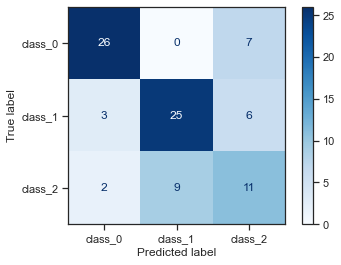

In [31]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(cl1_1, wine_X_test, wine_y_test, 
                      display_labels=wine.target_names, cmap=plt.cm.Blues)

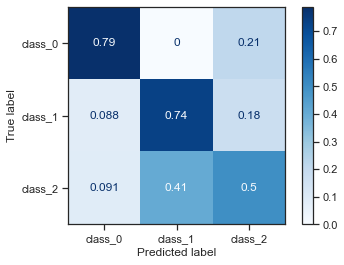

In [32]:
plot_confusion_matrix(cl1_1, wine_X_test, wine_y_test, 
                      display_labels=wine.target_names, 
                      cmap=plt.cm.Blues, normalize='true')

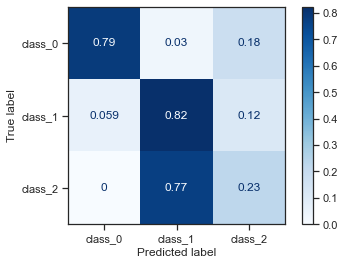

In [33]:
plot_confusion_matrix(cl1_2, wine_X_test, wine_y_test, 
                      display_labels=wine.target_names, 
                      cmap=plt.cm.Blues, normalize='true')

3) Precision, recall и F-мера

In [34]:
# Для 3 ближайших соседей
precision_score(bin_wine_y_test, bin_target1_1), recall_score(bin_wine_y_test, bin_target1_1)

(0.4583333333333333, 0.5)

In [35]:
# Для 10 ближайших соседей
precision_score(bin_wine_y_test, bin_target1_2), recall_score(bin_wine_y_test, bin_target1_2)

(0.3333333333333333, 0.22727272727272727)

In [36]:
# Параметры TP, TN, FP, FN считаются как сумма по всем классам
precision_score(wine_y_test, target1_1, average='micro')

0.6966292134831461

In [37]:
# Параметры TP, TN, FP, FN считаются отдельно для каждого класса 
# и берется среднее значение, дисбаланс классов не учитывается.
precision_score(wine_y_test, target1_1, average='macro')

0.6774457094665824

In [38]:
# Параметры TP, TN, FP, FN считаются отдельно для каждого класса 
# и берется средневзвешенное значение, дисбаланс классов учитывается 
# в виде веса классов (вес - количество истинных значений каждого класса).
precision_score(wine_y_test, target1_1, average='weighted')

0.7051769964963152

In [39]:
f1_score(bin_wine_y_test, bin_target1_2)

0.27027027027027023

In [40]:
f1_score(wine_y_test, target1_1, average='micro')

0.6966292134831461

In [41]:
recall_score(wine_y_test, target1_1, average='micro')

0.6966292134831461

In [42]:
# Значения точности, полноты и F-меры для всех классов выборки
classification_report(wine_y_test, target1_1, 
                      target_names=wine.target_names, output_dict=True)

{'class_0': {'precision': 0.8387096774193549,
  'recall': 0.7878787878787878,
  'f1-score': 0.8125,
  'support': 33},
 'class_1': {'precision': 0.7352941176470589,
  'recall': 0.7352941176470589,
  'f1-score': 0.735294117647059,
  'support': 34},
 'class_2': {'precision': 0.4583333333333333,
  'recall': 0.5,
  'f1-score': 0.4782608695652174,
  'support': 22},
 'accuracy': 0.6966292134831461,
 'macro avg': {'precision': 0.6774457094665824,
  'recall': 0.6743909685086157,
  'f1-score': 0.6753516624040921,
  'support': 89},
 'weighted avg': {'precision': 0.7051769964963152,
  'recall': 0.6966292134831461,
  'f1-score': 0.7003847093307279,
  'support': 89}}

4) ROC-кривая и ROC AUC

In [43]:
# Обучим модели на задаче бинарной классифкации, 
# чтобы получить вероятности классов

# 3 ближайших соседа
bin_cl1_1 = KNeighborsClassifier(n_neighbors=3)
bin_cl1_1.fit(wine_X_train, bin_wine_y_train)
# предскажем метки классов
bin_cl1_1.predict(wine_X_test)

array([0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       0])

In [44]:
# Классы возвращаются в следующем порядке
bin_cl1_1.classes_

array([0, 1])

In [45]:
# предскажем вероятности классов
proba_target1_1 = bin_cl1_1.predict_proba(wine_X_test)
len(proba_target1_1), proba_target1_1

(89,
 array([[0.66666667, 0.33333333],
        [1.        , 0.        ],
        [0.33333333, 0.66666667],
        [0.66666667, 0.33333333],
        [1.        , 0.        ],
        [0.66666667, 0.33333333],
        [0.        , 1.        ],
        [1.        , 0.        ],
        [0.33333333, 0.66666667],
        [1.        , 0.        ],
        [1.        , 0.        ],
        [0.33333333, 0.66666667],
        [1.        , 0.        ],
        [1.        , 0.        ],
        [0.33333333, 0.66666667],
        [1.        , 0.        ],
        [1.        , 0.        ],
        [0.33333333, 0.66666667],
        [1.        , 0.        ],
        [1.        , 0.        ],
        [1.        , 0.        ],
        [1.        , 0.        ],
        [0.33333333, 0.66666667],
        [1.        , 0.        ],
        [0.66666667, 0.33333333],
        [0.33333333, 0.66666667],
        [1.        , 0.        ],
        [1.        , 0.        ],
        [1.        , 0.        ],
        [

In [46]:
# вероятность единичного (истинного) класса
true_proba_target1_1 = proba_target1_1[:,1]
true_proba_target1_1

array([0.33333333, 0.        , 0.66666667, 0.33333333, 0.        ,
       0.33333333, 1.        , 0.        , 0.66666667, 0.        ,
       0.        , 0.66666667, 0.        , 0.        , 0.66666667,
       0.        , 0.        , 0.66666667, 0.        , 0.        ,
       0.        , 0.        , 0.66666667, 0.        , 0.33333333,
       0.66666667, 0.        , 0.        , 0.        , 0.33333333,
       0.33333333, 0.33333333, 0.33333333, 0.        , 0.66666667,
       0.        , 0.        , 0.66666667, 0.        , 0.        ,
       0.        , 0.33333333, 0.66666667, 0.33333333, 0.        ,
       0.66666667, 0.33333333, 0.        , 0.        , 0.        ,
       0.33333333, 0.66666667, 0.66666667, 0.        , 0.33333333,
       0.33333333, 0.66666667, 0.        , 0.33333333, 0.        ,
       0.        , 0.        , 0.33333333, 0.33333333, 0.66666667,
       0.        , 0.        , 0.        , 0.        , 0.66666667,
       0.33333333, 0.        , 0.66666667, 0.66666667, 0.     

In [47]:
fpr, tpr, thresholds = roc_curve(bin_wine_y_test, true_proba_target1_1, 
                                 pos_label=1)
fpr, tpr, thresholds

(array([0.        , 0.01492537, 0.19402985, 0.34328358, 1.        ]),
 array([0.        , 0.        , 0.5       , 0.90909091, 1.        ]),
 array([2.        , 1.        , 0.66666667, 0.33333333, 0.        ]))

In [48]:
# Отрисовка ROC-кривой
def draw_roc_curve(y_true, y_score, pos_label, average):
    fpr, tpr, thresholds = roc_curve(y_true, y_score, 
                                     pos_label=pos_label)
    roc_auc_value = roc_auc_score(y_true, y_score, average=average)
    plt.figure()
    lw = 2
    plt.plot(fpr, tpr, color='darkorange',
             lw=lw, label='ROC curve (area = %0.2f)' % roc_auc_value)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

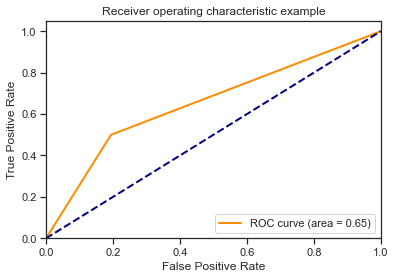

In [50]:
# Для 3 ближайших соседей
draw_roc_curve(bin_wine_y_test, bin_target1_1, pos_label=1, average='micro')

In [51]:
# Для 10 ближайших соседей
bin_cl1_2 = KNeighborsClassifier(n_neighbors=10)
bin_cl1_2.fit(wine_X_train, bin_wine_y_train)
proba_target2_1 = bin_cl1_2.predict_proba(wine_X_test)
true_proba_target2_1 = proba_target2_1[:,1]
roc_curve_k10_res = roc_curve(bin_wine_y_test, true_proba_target2_1, pos_label=1)
roc_curve_k10_res

(array([0.        , 0.01492537, 0.04477612, 0.19402985, 0.32835821,
        0.35820896, 0.41791045, 0.56716418, 1.        ]),
 array([0.        , 0.09090909, 0.18181818, 0.5       , 0.77272727,
        0.90909091, 0.90909091, 1.        , 1.        ]),
 array([1.7, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2, 0.1, 0. ]))

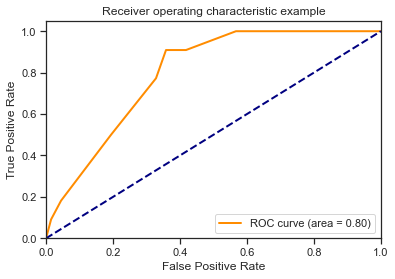

In [52]:
draw_roc_curve(bin_wine_y_test, true_proba_target2_1, pos_label=1, average='micro')

## Подбор гиперпараметра K с использованием GridSearchCV и кросс-валидации

In [53]:
from sklearn.model_selection import GridSearchCV

In [77]:
n_range = np.array(range(5, 55, 5))
tuned_parameters = [{'n_neighbors': n_range}]
tuned_parameters

[{'n_neighbors': array([ 5, 10, 15, 20, 25, 30, 35, 40, 45, 50])}]

In [55]:
%%time
clf_gs = GridSearchCV(KNeighborsClassifier(), tuned_parameters, cv=5, scoring='accuracy')
clf_gs.fit(wine_X_train, wine_y_train)

Wall time: 424 ms


GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid=[{'n_neighbors': array([ 5, 10, 15, 20, 25, 30, 35, 40, 45, 50])}],
             scoring='accuracy')

In [56]:
clf_gs.cv_results_

{'mean_fit_time': array([0.00364857, 0.00323715, 0.0022912 , 0.00237217, 0.00137711,
        0.0013763 , 0.00162058, 0.00100832, 0.00100827, 0.00067492]),
 'std_fit_time': array([5.47567878e-04, 1.01310007e-03, 5.42314009e-04, 7.83711754e-04,
        4.62453064e-04, 5.06059070e-04, 5.22900341e-04, 3.42909909e-05,
        6.67901418e-04, 3.63937770e-04]),
 'mean_score_time': array([0.00980382, 0.00624776, 0.00581241, 0.00518398, 0.00312529,
        0.00419807, 0.00586729, 0.00357432, 0.00354428, 0.00303535]),
 'std_score_time': array([0.00341847, 0.00077434, 0.00040802, 0.00116442, 0.00011496,
        0.00116789, 0.00170025, 0.00077099, 0.00106359, 0.00154788]),
 'param_n_neighbors': masked_array(data=[5, 10, 15, 20, 25, 30, 35, 40, 45, 50],
              mask=[False, False, False, False, False, False, False, False,
                    False, False],
        fill_value='?',
             dtype=object),
 'params': [{'n_neighbors': 5},
  {'n_neighbors': 10},
  {'n_neighbors': 15},
  {'n_ne

In [78]:
#Лучшее значение параметров:
clf_gs.best_params_

{'n_neighbors': 25}

In [79]:
#Лучшее значение метрики:
clf_gs.best_score_

0.7191011235955056

## Сравнение метрик качества исходной и оптимальной моделей

In [100]:
#Обучение модели и оценка качества с учетом подобранных гиперпараметров
clf_gs.best_estimator_.fit(wine_X_train, wine_y_train)
target1_3 = clf_gs.best_estimator_.predict(wine_X_test)

In [102]:
# Новое качество модели
accuracy_score(wine_y_test, target1_3)

0.7303370786516854

In [99]:
# Качество модели до подбора гиперпараметров
accuracy_score(wine_y_test, target1_1)

0.6966292134831461